#The following two cells are setup

In [5]:
#This code makes the slide show prettier by hiding the raw code.
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [4]:
%%javascript
IPython.load_extensions('drag-and-drop');

<IPython.core.display.Javascript object>

# PES Start
When I ran an optimization on the molucule it just crashed into Cl2 and expelled the H. I Next tried to create a PES where I could try to see any points of interest, this is my attempt at visualizing this data.

In [2]:
#Color Pallets
import colorlover as cl

#Matplot 3d stuff
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


import pandas
import numpy
%matplotlib nbagg

#This imports from the plotly library and then logs in with my credentials
import plotly
import plotly.plotly as py
from plotly.graph_objs import *
import plotly.tools as tls
tls.set_credentials_file(username="ignare", 
                             api_key="jebd3q1qet")

In [3]:
rawData = pandas.read_excel('/Users/Ignare/Copy/Work/Research/Cl-HCl/Cl-HCl.xlsx')
rawData.head()

,H-Cl,Cl-Cl,Ang,Energy,-920.87021651,C.Energy,R.Energy
0,1.333333,3.000000,101.25,-920.870217,Min,0.000000,0.000000
1,1.333333,2.666667,90.00,-920.869924,NaN,0.000293,0.000086
2,1.333333,3.000000,112.50,-920.869612,NaN,0.000605,0.000178
3,1.333333,2.666667,101.25,-920.869524,NaN,0.000692,0.000204
4,1.333333,2.666667,112.50,-920.868756,NaN,0.001461,0.000431


In [16]:

#Set up coloration
bupu = cl.scales['9']['seq']['BuPu']
bupu500 = cl.interp( bupu, 900 ) # Map color scale to 500 bins


#colors = rgb[1,1,rawData['R.Energy']]

temp = Scatter3d(x = rawData['H-Cl'],
                y = rawData['Cl-Cl'],
                z = rawData['Energy'],
                mode='markers',      # (!) draw lines between coords (as in Scatter)
                marker=Marker(
                    size = 5,
                    
                    #color = 'rgba(rawData['R.Energy'],0,0,1)'
                    #color = rawData['C.Energy'],
                    color = 'blue',
                    opacity=0.5
                )
            )
data = Data([temp])
layout = Layout(
        #Overall title
        title = "Energy vs Bond Legth and Bond Angle",
        #The axis are contained in a scene object for 3d plots
        scene = Scene(
            xaxis=XAxis(title='H-Cl Bond Length(Ang)'),
            yaxis=YAxis(title='Cl-Cl Bond Length(Ang)'),
            zaxis=ZAxis(title='',
                       range=[-921.0, -920]
                       )
        ),
    
        autosize=False,
        width=1000,
        height=500,
        margin=Margin(
            l=50,
            r=50,
            b=100,
            t=100,
            pad=4
        )
            
    )
fig = Figure(data=data, layout=layout)
py.iplot(fig)

In [24]:
#Contrast colors out.
# f(x)=αx+β
r = 128
g = 255
b = 255




temp = Scatter3d(x = rawData['H-Cl'],
                y = rawData['Cl-Cl'],
                z = rawData['Ang'],
                mode='markers',      # (!) draw lines between coords (as in Scatter)
                marker=Marker(
                    size = 10,

                    color = (r,g,b),

                    opacity=0.1
                )
            )
data = Data([temp])
layout = Layout(
        #Overall title
        title = "Energy vs Bond Legth and Bond Angle",
        #The axis are contained in a scene object for 3d plots
        scene = Scene(
            xaxis=XAxis(title='H-Cl Bond Length(Ang)'),
            yaxis=YAxis(title='Cl-Cl Bond Length(Ang)'),
            zaxis=ZAxis(title='',
                       #range=[-921.0, -920]
                       )
        ),
    
        autosize=False,
        width=1000,
        height=500,
        margin=Margin(
            l=50,
            r=50,
            b=100,
            t=100,
            pad=4
        )
            
    )
fig = Figure(data=data, layout=layout)
py.iplot(fig)

<IPython.core.display.Javascript object>


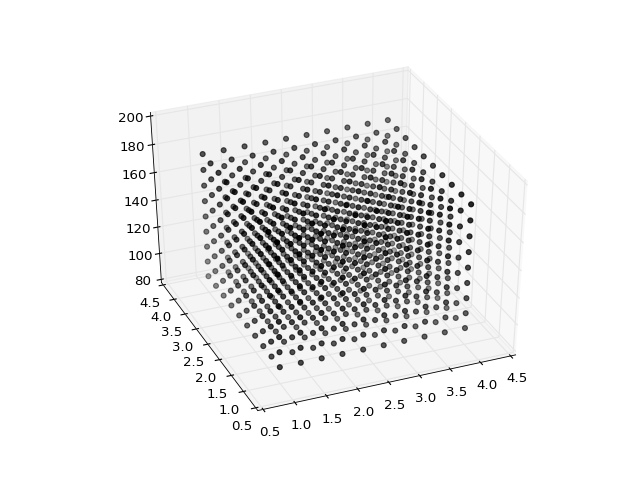

In [7]:
#colours = 1/rawData['R.Energy']
color = [str(item/255.) for item in rawData['R.Energy']]

# Attempt at 3d plot in matplotlib
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter3D(rawData['H-Cl'], rawData['Cl-Cl'],rawData['Ang'],
    color = color,

    marker = 'o'
)
plt.gray()

#Stable Geometry!
After finding the well we were then able to zero in on the geometry of interest.

# Charge decomposition analysis
Was used to identify the interacting orbitals in the two fragments
These calculations were based on B3LYP

#CCSD Calculations
Used for high level calculations.
